In [1]:
from sqlalchemy import create_engine, text
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

from datetime import date

pd.set_option('display.max_columns', None)

NOTES:
- How to handle values that contain <1 & > 99 (drop numerators?)
- Drop blank testing records
- Combine all Examiners into 1 column 
- Drop duplicate records 
- Drop unnecessary columns 

In [2]:
# Cleaned data in Excel 
# Cleaned missing examiner info
# Cleaned date of testing
df = pd.read_excel('../data/bdi3_all_evals_clean.xlsx')

In [3]:
df.head(1)

,Child ID,Gender,Date of Birth,Location - Sub Level 1,Program Label,Date of Testing,Examiner,Adaptive Sum of Scaled Scores,Adaptive Developmental Quotient,Adaptive Percentile Rank,Adaptive 95% Confidence Interval,Adaptive RDI,Adaptive Z-Score,Adaptive T-Score,Adaptive NCE,Social-Emotional Sum of Scaled Scores,Social-Emotional Developmental Quotient,Social-Emotional Percentile Rank,Social-Emotional 95% Confidence Interval,Social-Emotional RDI,Social-Emotional Z-Score,Social-Emotional T-Score,Social-Emotional NCE,Communication Sum of Scaled Scores,Communication Developmental Quotient,Communication Percentile Rank,Communication 95% Confidence Interval,Communication RDI,Communication Z-Score,Communication T-Score,Communication NCE,Motor Sum of Scaled Scores,Motor Developmental Quotient,Motor Percentile Rank,Motor 95% Confidence Interval,Motor RDI,Motor Z-Score,Motor T-Score,Motor NCE,Cognitive Sum of Scaled Scores,Cognitive Developmental Quotient,Cognitive Percentile Rank,Cognitive 95% Confidence Interval,Cognitive RDI,Cognitive Z-Score,Cognitive T-Score,Cognitive NCE,BDI-3 Total Sum of Scaled Scores,BDI-3 Total Developmental Quotient,BDI-3 Total Percentile Rank,BDI-3 Total 90% Confidence Interval,BDI-3 Total 95% Confidence Interval,BDI-3 Total Z-Score,BDI-3 Total T-Score,BDI-3 Total NCE,Adaptive-Self Care RS,Adaptive-Self Care SS,Adaptive-Self Care PR,Adaptive-Self Care AE,Adaptive-Self Care RDI,Adaptive-Self Care CSS,Adaptive-Self Care CSS 90%,Adaptive-Self Care Z-Score,Adaptive-Self Care T-Score,Adaptive-Self Care NCE,Adaptive-Personal Responsibility RS,Adaptive-Personal Responsibility SS,Adaptive-Personal Responsibility PR,Adaptive-Personal Responsibility AE,Adaptive-Personal Responsibility RDI,Adaptive-Personal Responsibility CSS,Adaptive-Personal Responsibility CSS 90%,Adaptive-Personal Responsibility Z-Score,Adaptive-Personal Responsibility T-Score,Adaptive-Personal Responsibility NCE,Social Emotional-Adult Interaction RS,Social Emotional-Adult Interaction SS,Social Emotional-Adult Interaction PR,Social Emotional-Adult Interaction AE,Social Emotional-Adult Interaction RDI,Social Emotional-Adult Interaction CSS,Social Emotional-Adult Interaction CSS 90%,Social Emotional-Adult Interaction Z-Score,Social Emotional-Adult Interaction T-Score,Social Emotional-Adult Interaction NCE,Social Emotional-Peer Interaction RS,Social Emotional-Peer Interaction SS,Social Emotional-Peer Interaction PR,Social Emotional-Peer Interaction AE,Social Emotional-Peer Interaction RDI,Social Emotional-Peer Interaction CSS,Social Emotional-Peer Interaction CSS 90%,Social Emotional-Peer Interaction Z-Score,Social Emotional-Peer Interaction T-Score,Social Emotional-Peer Interaction NCE,Social Emotional-Self Concept / Social Role RS,Social Emotional-Self Concept / Social Role SS,Social Emotional-Self Concept / Social Role PR,Social Emotional-Self Concept / Social Role AE,Social Emotional-Self Concept / Social Role RDI,Social Emotional-Self Concept / Social Role CSS,Social Emotional-Self Concept / Social Role CSS 90%,Social Emotional-Self Concept / Social Role Z-Score,Social Emotional-Self Concept / Social Role T-Score,Social Emotional-Self Concept / Social Role NCE,Communication-Receptive Communication RS,Communication-Receptive Communication SS,Communication-Receptive Communication PR,Communication-Receptive Communication AE,Communication-Receptive Communication RDI,Communication-Receptive Communication CSS,Communication-Receptive Communication CSS 90%,Communication-Receptive Communication Z-Score,Communication-Receptive Communication T-Score,Communication-Receptive Communication NCE,Communication-Expressive Communication RS,Communication-Expressive Communication SS,Communication-Expressive Communication PR,Communication-Expressive Communication AE,Communication-Expressive Communication RDI,Communication-Expressive Communication CSS,Communication-Expressive Communication CSS 90%,Communication-Expressive Communication Z-Score,Communication-Expressive Comm

In [4]:
df.shape

(23944, 186)

### Add 'Age at Testing' column for Q4

In [5]:
# Calculate the age at testing
df['Age at Testing'] = ((df['Date of Testing'] - df['Date of Birth']).dt.days) / 365
df.head()

,Child ID,Gender,Date of Birth,Location - Sub Level 1,Program Label,Date of Testing,Examiner,Adaptive Sum of Scaled Scores,Adaptive Developmental Quotient,Adaptive Percentile Rank,Adaptive 95% Confidence Interval,Adaptive RDI,Adaptive Z-Score,Adaptive T-Score,Adaptive NCE,Social-Emotional Sum of Scaled Scores,Social-Emotional Developmental Quotient,Social-Emotional Percentile Rank,Social-Emotional 95% Confidence Interval,Social-Emotional RDI,Social-Emotional Z-Score,Social-Emotional T-Score,Social-Emotional NCE,Communication Sum of Scaled Scores,Communication Developmental Quotient,Communication Percentile Rank,Communication 95% Confidence Interval,Communication RDI,Communication Z-Score,Communication T-Score,Communication NCE,Motor Sum of Scaled Scores,Motor Developmental Quotient,Motor Percentile Rank,Motor 95% Confidence Interval,Motor RDI,Motor Z-Score,Motor T-Score,Motor NCE,Cognitive Sum of Scaled Scores,Cognitive Developmental Quotient,Cognitive Percentile Rank,Cognitive 95% Confidence Interval,Cognitive RDI,Cognitive Z-Score,Cognitive T-Score,Cognitive NCE,BDI-3 Total Sum of Scaled Scores,BDI-3 Total Developmental Quotient,BDI-3 Total Percentile Rank,BDI-3 Total 90% Confidence Interval,BDI-3 Total 95% Confidence Interval,BDI-3 Total Z-Score,BDI-3 Total T-Score,BDI-3 Total NCE,Adaptive-Self Care RS,Adaptive-Self Care SS,Adaptive-Self Care PR,Adaptive-Self Care AE,Adaptive-Self Care RDI,Adaptive-Self Care CSS,Adaptive-Self Care CSS 90%,Adaptive-Self Care Z-Score,Adaptive-Self Care T-Score,Adaptive-Self Care NCE,Adaptive-Personal Responsibility RS,Adaptive-Personal Responsibility SS,Adaptive-Personal Responsibility PR,Adaptive-Personal Responsibility AE,Adaptive-Personal Responsibility RDI,Adaptive-Personal Responsibility CSS,Adaptive-Personal Responsibility CSS 90%,Adaptive-Personal Responsibility Z-Score,Adaptive-Personal Responsibility T-Score,Adaptive-Personal Responsibility NCE,Social Emotional-Adult Interaction RS,Social Emotional-Adult Interaction SS,Social Emotional-Adult Interaction PR,Social Emotional-Adult Interaction AE,Social Emotional-Adult Interaction RDI,Social Emotional-Adult Interaction CSS,Social Emotional-Adult Interaction CSS 90%,Social Emotional-Adult Interaction Z-Score,Social Emotional-Adult Interaction T-Score,Social Emotional-Adult Interaction NCE,Social Emotional-Peer Interaction RS,Social Emotional-Peer Interaction SS,Social Emotional-Peer Interaction PR,Social Emotional-Peer Interaction AE,Social Emotional-Peer Interaction RDI,Social Emotional-Peer Interaction CSS,Social Emotional-Peer Interaction CSS 90%,Social Emotional-Peer Interaction Z-Score,Social Emotional-Peer Interaction T-Score,Social Emotional-Peer Interaction NCE,Social Emotional-Self Concept / Social Role RS,Social Emotional-Self Concept / Social Role SS,Social Emotional-Self Concept / Social Role PR,Social Emotional-Self Concept / Social Role AE,Social Emotional-Self Concept / Social Role RDI,Social Emotional-Self Concept / Social Role CSS,Social Emotional-Self Concept / Social Role CSS 90%,Social Emotional-Self Concept / Social Role Z-Score,Social Emotional-Self Concept / Social Role T-Score,Social Emotional-Self Concept / Social Role NCE,Communication-Receptive Communication RS,Communication-Receptive Communication SS,Communication-Receptive Communication PR,Communication-Receptive Communication AE,Communication-Receptive Communication RDI,Communication-Receptive Communication CSS,Communication-Receptive Communication CSS 90%,Communication-Receptive Communication Z-Score,Communication-Receptive Communication T-Score,Communication-Receptive Communication NCE,Communication-Expressive Communication RS,Communication-Expressive Communication SS,Communication-Expressive Communication PR,Communication-Expressive Communication AE,Communication-Expressive Communication RDI,Communication-Expressive Communication CSS,Communication-Expressive Communication CSS 90%,Communication-Expressive Communication Z-Score,Communication-Expressive Comm

In [6]:
df['months'] = (df['Age at Testing'] * 12).apply(int)

In [36]:
df['years'] = (df['months'] / 12).apply(int)

In [37]:
df.head()

,Child ID,Gender,Date of Birth,Location - Sub Level 1,Program Label,Date of Testing,Examiner,Adaptive Sum of Scaled Scores,Adaptive Developmental Quotient,Adaptive Percentile Rank,Adaptive 95% Confidence Interval,Adaptive RDI,Adaptive Z-Score,Adaptive T-Score,Adaptive NCE,Social-Emotional Sum of Scaled Scores,Social-Emotional Developmental Quotient,Social-Emotional Percentile Rank,Social-Emotional 95% Confidence Interval,Social-Emotional RDI,Social-Emotional Z-Score,Social-Emotional T-Score,Social-Emotional NCE,Communication Sum of Scaled Scores,Communication Developmental Quotient,Communication Percentile Rank,Communication 95% Confidence Interval,Communication RDI,Communication Z-Score,Communication T-Score,Communication NCE,Motor Sum of Scaled Scores,Motor Developmental Quotient,Motor Percentile Rank,Motor 95% Confidence Interval,Motor RDI,Motor Z-Score,Motor T-Score,Motor NCE,Cognitive Sum of Scaled Scores,Cognitive Developmental Quotient,Cognitive Percentile Rank,Cognitive 95% Confidence Interval,Cognitive RDI,Cognitive Z-Score,Cognitive T-Score,Cognitive NCE,BDI-3 Total Sum of Scaled Scores,BDI-3 Total Developmental Quotient,BDI-3 Total Percentile Rank,BDI-3 Total 90% Confidence Interval,BDI-3 Total 95% Confidence Interval,BDI-3 Total Z-Score,BDI-3 Total T-Score,BDI-3 Total NCE,Adaptive-Self Care RS,Adaptive-Self Care SS,Adaptive-Self Care PR,Adaptive-Self Care AE,Adaptive-Self Care RDI,Adaptive-Self Care CSS,Adaptive-Self Care CSS 90%,Adaptive-Self Care Z-Score,Adaptive-Self Care T-Score,Adaptive-Self Care NCE,Adaptive-Personal Responsibility RS,Adaptive-Personal Responsibility SS,Adaptive-Personal Responsibility PR,Adaptive-Personal Responsibility AE,Adaptive-Personal Responsibility RDI,Adaptive-Personal Responsibility CSS,Adaptive-Personal Responsibility CSS 90%,Adaptive-Personal Responsibility Z-Score,Adaptive-Personal Responsibility T-Score,Adaptive-Personal Responsibility NCE,Social Emotional-Adult Interaction RS,Social Emotional-Adult Interaction SS,Social Emotional-Adult Interaction PR,Social Emotional-Adult Interaction AE,Social Emotional-Adult Interaction RDI,Social Emotional-Adult Interaction CSS,Social Emotional-Adult Interaction CSS 90%,Social Emotional-Adult Interaction Z-Score,Social Emotional-Adult Interaction T-Score,Social Emotional-Adult Interaction NCE,Social Emotional-Peer Interaction RS,Social Emotional-Peer Interaction SS,Social Emotional-Peer Interaction PR,Social Emotional-Peer Interaction AE,Social Emotional-Peer Interaction RDI,Social Emotional-Peer Interaction CSS,Social Emotional-Peer Interaction CSS 90%,Social Emotional-Peer Interaction Z-Score,Social Emotional-Peer Interaction T-Score,Social Emotional-Peer Interaction NCE,Social Emotional-Self Concept / Social Role RS,Social Emotional-Self Concept / Social Role SS,Social Emotional-Self Concept / Social Role PR,Social Emotional-Self Concept / Social Role AE,Social Emotional-Self Concept / Social Role RDI,Social Emotional-Self Concept / Social Role CSS,Social Emotional-Self Concept / Social Role CSS 90%,Social Emotional-Self Concept / Social Role Z-Score,Social Emotional-Self Concept / Social Role T-Score,Social Emotional-Self Concept / Social Role NCE,Communication-Receptive Communication RS,Communication-Receptive Communication SS,Communication-Receptive Communication PR,Communication-Receptive Communication AE,Communication-Receptive Communication RDI,Communication-Receptive Communication CSS,Communication-Receptive Communication CSS 90%,Communication-Receptive Communication Z-Score,Communication-Receptive Communication T-Score,Communication-Receptive Communication NCE,Communication-Expressive Communication RS,Communication-Expressive Communication SS,Communication-Expressive Communication PR,Communication-Expressive Communication AE,Communication-Expressive Communication RDI,Communication-Expressive Communication CSS,Communication-Expressive Communication CSS 90%,Communication-Expressive Communication Z-Score,Communication-Expressive Comm

### Clean RDI Column - Drop numerator & apply to all RDI columns

In [8]:
# Andri's function to clean RDI
def clean_rdi(column):
    months = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}
    adaptive_rdi = df[column].str[0:-3]
    adaptive_rdi = [months[i] if i in months.keys() else i for i in adaptive_rdi] 
    adaptive_rdi = [0 if str(i)[0:1] == '<' else i for i in adaptive_rdi] 
    adaptive_rdi = [100 if str(i)[0:1] == '>' else i for i in adaptive_rdi] 
    adaptive_rdi = pd.to_numeric(adaptive_rdi)
    return adaptive_rdi

In [9]:
# Apply function to all columns with 'RDI'
for column in df.columns:
    if 'RDI' in column:
        df[column] = clean_rdi(column)

In [10]:
df.sort_values('Gender')

,Child ID,Gender,Date of Birth,Location - Sub Level 1,Program Label,Date of Testing,Examiner,Adaptive Sum of Scaled Scores,Adaptive Developmental Quotient,Adaptive Percentile Rank,Adaptive 95% Confidence Interval,Adaptive RDI,Adaptive Z-Score,Adaptive T-Score,Adaptive NCE,Social-Emotional Sum of Scaled Scores,Social-Emotional Developmental Quotient,Social-Emotional Percentile Rank,Social-Emotional 95% Confidence Interval,Social-Emotional RDI,Social-Emotional Z-Score,Social-Emotional T-Score,Social-Emotional NCE,Communication Sum of Scaled Scores,Communication Developmental Quotient,Communication Percentile Rank,Communication 95% Confidence Interval,Communication RDI,Communication Z-Score,Communication T-Score,Communication NCE,Motor Sum of Scaled Scores,Motor Developmental Quotient,Motor Percentile Rank,Motor 95% Confidence Interval,Motor RDI,Motor Z-Score,Motor T-Score,Motor NCE,Cognitive Sum of Scaled Scores,Cognitive Developmental Quotient,Cognitive Percentile Rank,Cognitive 95% Confidence Interval,Cognitive RDI,Cognitive Z-Score,Cognitive T-Score,Cognitive NCE,BDI-3 Total Sum of Scaled Scores,BDI-3 Total Developmental Quotient,BDI-3 Total Percentile Rank,BDI-3 Total 90% Confidence Interval,BDI-3 Total 95% Confidence Interval,BDI-3 Total Z-Score,BDI-3 Total T-Score,BDI-3 Total NCE,Adaptive-Self Care RS,Adaptive-Self Care SS,Adaptive-Self Care PR,Adaptive-Self Care AE,Adaptive-Self Care RDI,Adaptive-Self Care CSS,Adaptive-Self Care CSS 90%,Adaptive-Self Care Z-Score,Adaptive-Self Care T-Score,Adaptive-Self Care NCE,Adaptive-Personal Responsibility RS,Adaptive-Personal Responsibility SS,Adaptive-Personal Responsibility PR,Adaptive-Personal Responsibility AE,Adaptive-Personal Responsibility RDI,Adaptive-Personal Responsibility CSS,Adaptive-Personal Responsibility CSS 90%,Adaptive-Personal Responsibility Z-Score,Adaptive-Personal Responsibility T-Score,Adaptive-Personal Responsibility NCE,Social Emotional-Adult Interaction RS,Social Emotional-Adult Interaction SS,Social Emotional-Adult Interaction PR,Social Emotional-Adult Interaction AE,Social Emotional-Adult Interaction RDI,Social Emotional-Adult Interaction CSS,Social Emotional-Adult Interaction CSS 90%,Social Emotional-Adult Interaction Z-Score,Social Emotional-Adult Interaction T-Score,Social Emotional-Adult Interaction NCE,Social Emotional-Peer Interaction RS,Social Emotional-Peer Interaction SS,Social Emotional-Peer Interaction PR,Social Emotional-Peer Interaction AE,Social Emotional-Peer Interaction RDI,Social Emotional-Peer Interaction CSS,Social Emotional-Peer Interaction CSS 90%,Social Emotional-Peer Interaction Z-Score,Social Emotional-Peer Interaction T-Score,Social Emotional-Peer Interaction NCE,Social Emotional-Self Concept / Social Role RS,Social Emotional-Self Concept / Social Role SS,Social Emotional-Self Concept / Social Role PR,Social Emotional-Self Concept / Social Role AE,Social Emotional-Self Concept / Social Role RDI,Social Emotional-Self Concept / Social Role CSS,Social Emotional-Self Concept / Social Role CSS 90%,Social Emotional-Self Concept / Social Role Z-Score,Social Emotional-Self Concept / Social Role T-Score,Social Emotional-Self Concept / Social Role NCE,Communication-Receptive Communication RS,Communication-Receptive Communication SS,Communication-Receptive Communication PR,Communication-Receptive Communication AE,Communication-Receptive Communication RDI,Communication-Receptive Communication CSS,Communication-Receptive Communication CSS 90%,Communication-Receptive Communication Z-Score,Communication-Receptive Communication T-Score,Communication-Receptive Communication NCE,Communication-Expressive Communication RS,Communication-Expressive Communication SS,Communication-Expressive Communication PR,Communication-Expressive Communication AE,Communication-Expressive Communication RDI,Communication-Expressive Communication CSS,Communication-Expressive Communication CSS 90%,Communication-Expressive Communication Z-Score,Communication-Expressive Comm

### String Cleaning

In [11]:
# Swtich to strings
df[['Gender', 'Location - Sub Level 1', 'Program Label', 'Examiner']] = df[['Gender', 'Location - Sub Level 1', 'Program Label', 'Examiner']].astype('string')
#df.info()

### Clean 'interval' columns by converting to strings

In [12]:
# Clean String Function
def string_clean(column):
    x = df[column].astype('string')
    return x

In [13]:
# Apply to all confidence intervals 
for column in df.columns:
    if 'Interval' in column:
        df[column] = string_clean(column)

### Switch 'Score' columns to numeric

In [14]:
df.groupby('Motor Z-Score')['Motor Z-Score'].count()

Motor Z-Score
0         1440
0.13       651
0.2        741
0.27       663
0.4       1249
          ... 
– 3.27      74
– 3.40      94
– 3.60     127
– 3.73      18
– 3.87     119
Name: Motor Z-Score, Length: 65, dtype: int64

In [15]:
def clean_z(column):
    z_col = df['Motor Z-Score'].astype(str).replace('– ', '-', regex=True)
    z_col =  z_col.replace('--', 0, regex=True)
    z_col =  z_col.apply(lambda x: float(x.replace('– ', '')) * -1 if '– ' in x else float(x))
    z_col =  z_col.fillna(0)
    return z_col

In [16]:
for column in df.columns:
    if 'Z-Score' in column:
        df[column] = clean_z(column)

TypeError: argument of type 'int' is not iterable

In [17]:
z_scores = [col for col in df.columns if 'Z-Score' in col]
z = df[z_scores]
z.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23944 entries, 0 to 23943
Data columns (total 19 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   Adaptive Z-Score                                     23939 non-null  object
 1   Social-Emotional Z-Score                             23927 non-null  object
 2   Communication Z-Score                                23912 non-null  object
 3   Motor Z-Score                                        23912 non-null  object
 4   Cognitive Z-Score                                    23926 non-null  object
 5   BDI-3 Total Z-Score                                  23750 non-null  object
 6   Adaptive-Self Care Z-Score                           23940 non-null  object
 7   Adaptive-Personal Responsibility Z-Score             13139 non-null  object
 8   Social Emotional-Adult Interaction Z-Score           23935 non-null  object


In [ ]:
z.head()

In [19]:
# Using Amy's function to create column with eligibility
def filter(x):
    if x <= 70:
        return '40% delay'
    if (x >= 71 and x <= 78):
        return '25% delay'
    if x >= 79:
        return 'not eligible'
#applying the filter function to 'Salary' column 
df['Eligibility'] = df['BDI-3 Total Developmental Quotient'].apply(filter)

# MVP

## 4. Does the child's age seem to impact their scoring?

In [38]:
general = df.iloc[:, :7]

In [39]:
bdi_totals = [col for col in df.columns if 'BDI-3 Total' in col]
bdi = df[bdi_totals]
bdi

,BDI-3 Total Sum of Scaled Scores,BDI-3 Total Developmental Quotient,BDI-3 Total Percentile Rank,BDI-3 Total 90% Confidence Interval,BDI-3 Total 95% Confidence Interval,BDI-3 Total Z-Score,BDI-3 Total T-Score,BDI-3 Total NCE
0,15.0,40.0,<0.1,39-43,38-44,NaN,NaN,NaN
2,24.0,44.0,<0.1,43-47,42-48,– 3.73,13.0,<1
4,37.0,51.0,<0.1,49-53,48-54,– 3.27,17.0,<1
6,19.0,42.0,<0.1,41-45,40-46,– 3.87,11.0,<1
7,14.0,40.0,<0.1,39-43,38-44,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
23939,NaN,NaN,NaN,<NA>,<NA>,NaN,NaN,NaN
23940,NaN,NaN,NaN,<NA>,<NA>,NaN,NaN,NaN
23941,NaN,NaN,NaN,<NA>,<NA>,NaN,NaN,NaN
23942,NaN,NaN,NaN,<NA>,<NA>,NaN,NaN,NaN


In [40]:
df = df.drop_duplicates()

In [41]:
df.shape

(19498, 190)

In [44]:
age_and_elig = df.iloc[:,-4:]
age_and_elig 

,Age at Testing,months,Eligibility,years
0,2.978082,35,40% delay,2
2,3.758904,45,40% delay,3
4,3.306849,39,40% delay,3
6,3.753425,45,40% delay,3
7,3.205479,38,40% delay,3
...,...,...,...,...
23939,2.145205,25,None,2
23940,3.304110,39,None,3
23941,0.698630,8,None,0
23942,2.810959,33,None,2


In [45]:
bdi_df = pd.concat([general, bdi, age_and_elig], axis=1)
bdi_df

,Child ID,Gender,Date of Birth,Location - Sub Level 1,Program Label,Date of Testing,Examiner,BDI-3 Total Sum of Scaled Scores,BDI-3 Total Developmental Quotient,BDI-3 Total Percentile Rank,BDI-3 Total 90% Confidence Interval,BDI-3 Total 95% Confidence Interval,BDI-3 Total Z-Score,BDI-3 Total T-Score,BDI-3 Total NCE,Age at Testing,months,Eligibility,years
0,404042,M,2020-03-17,Upper Cumberland,BDI-3 Annual Evaluation,2023-03-09,Stacy Holden,15.0,40.0,<0.1,39-43,38-44,NaN,NaN,NaN,2.978082,35,40% delay,2
2,475636,F,2019-10-16,Northwest,BDI-3 Annual Evaluation,2023-07-19,Jennifer Hodges,24.0,44.0,<0.1,43-47,42-48,– 3.73,13.0,<1,3.758904,45,40% delay,3
4,476193,M,2019-11-08,Memphis Delta,BDI-3 Annual Evaluation,2023-02-27,Kayla Coley,37.0,51.0,<0.1,49-53,48-54,– 3.27,17.0,<1,3.306849,39,40% delay,3
6,477177,M,2020-01-23,South Central,BDI-3 Annual Evaluation,2023-10-24,Darla Tucker,19.0,42.0,<0.1,41-45,40-46,– 3.87,11.0,<1,3.753425,45,40% delay,3
7,479487,F,2020-02-03,Memphis Delta,BDI-3 Annual Evaluation,2023-04-18,Lauryn Hartness,14.0,40.0,<0.1,39-43,38-44,NaN,NaN,NaN,3.205479,38,40% delay,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23939,544499,M,2020-11-25,Greater Nashville,BDI-3 Eligibility Evaluation,2023-01-17,Tracey Hardiman,NaN,NaN,NaN,<NA>,<NA>,NaN,NaN,NaN,2.145205,25,None,2
23940,549646,M,2020-05-02,Southeast Tennessee,BDI-3 Eligibility Evaluation,2023-08-21,Mollee Favre,NaN,NaN,NaN,<NA>,<NA>,NaN,NaN,NaN,3.304110,39,None,3
23941,552599,F,2022-08-27,First Tennessee,BDI-3 Eligibility Evaluation,2023-05-09,Karen McMillion,NaN,NaN,NaN,<NA>,<NA>,NaN,NaN,NaN,0.698630,8,None,0
23942,SP00659,M,2020-07-30,East Tennessee,BDI-3 Eligibility Evaluation,2023-05-22,Kelly Brackney,NaN,NaN,NaN,<NA>,<NA>,NaN,NaN,NaN,2.810959,33,None,2


In [49]:
bdi_dq_by_age = bdi_df.groupby(['years', 'months'])['BDI-3 Total Developmental Quotient'].mean()

In [52]:
bdi_dq_by_age.reset_index(name='bdi_avg')

,years,months,bdi_avg
0,0,0,102.719231
1,0,1,102.178368
2,0,2,95.887884
3,0,3,91.980282
4,0,4,92.059375
5,0,5,91.763285
6,0,6,93.236749
7,0,7,93.303644
8,0,8,93.982659
9,0,9,94.165217


In [64]:
bdi_by_age = pd.DataFrame(bdi_dq_by_age).reset_index()
bdi_by_age

,years,months,BDI-3 Total Developmental Quotient
0,0,0,102.719231
1,0,1,102.178368
2,0,2,95.887884
3,0,3,91.980282
4,0,4,92.059375
5,0,5,91.763285
6,0,6,93.236749
7,0,7,93.303644
8,0,8,93.982659
9,0,9,94.165217


In [72]:
df.groupby(['years', 'months'])['years'].count()

years  months
0      0         262
       1         532
       2         555
       3         356
       4         320
       5         207
       6         283
       7         249
       8         175
       9         346
       10        270
       11        212
1      12        371
       13        413
       14        385
       15        551
       16        495
       17        375
       18        761
       19        787
       20        518
       21        496
       22        446
       23        433
2      24        969
       25        904
       26        663
       27        551
       28        618
       29        558
       30        801
       31        721
       32        563
       33        578
       34        876
       35        827
3      36        252
       37        155
       38        109
       39        109
       40         96
       41         93
       42         74
       43         83
       44         33
       45         35
       46         15

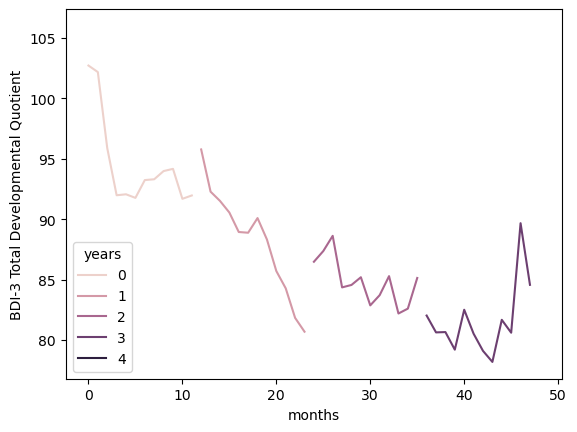

In [76]:
sns.lineplot(data=bdi_by_age, x='months', y='BDI-3 Total Developmental Quotient', hue='years');

In [73]:
df[df['months']==48]

,Child ID,Gender,Date of Birth,Location - Sub Level 1,Program Label,Date of Testing,Examiner,Adaptive Sum of Scaled Scores,Adaptive Developmental Quotient,Adaptive Percentile Rank,Adaptive 95% Confidence Interval,Adaptive RDI,Adaptive Z-Score,Adaptive T-Score,Adaptive NCE,Social-Emotional Sum of Scaled Scores,Social-Emotional Developmental Quotient,Social-Emotional Percentile Rank,Social-Emotional 95% Confidence Interval,Social-Emotional RDI,Social-Emotional Z-Score,Social-Emotional T-Score,Social-Emotional NCE,Communication Sum of Scaled Scores,Communication Developmental Quotient,Communication Percentile Rank,Communication 95% Confidence Interval,Communication RDI,Communication Z-Score,Communication T-Score,Communication NCE,Motor Sum of Scaled Scores,Motor Developmental Quotient,Motor Percentile Rank,Motor 95% Confidence Interval,Motor RDI,Motor Z-Score,Motor T-Score,Motor NCE,Cognitive Sum of Scaled Scores,Cognitive Developmental Quotient,Cognitive Percentile Rank,Cognitive 95% Confidence Interval,Cognitive RDI,Cognitive Z-Score,Cognitive T-Score,Cognitive NCE,BDI-3 Total Sum of Scaled Scores,BDI-3 Total Developmental Quotient,BDI-3 Total Percentile Rank,BDI-3 Total 90% Confidence Interval,BDI-3 Total 95% Confidence Interval,BDI-3 Total Z-Score,BDI-3 Total T-Score,BDI-3 Total NCE,Adaptive-Self Care RS,Adaptive-Self Care SS,Adaptive-Self Care PR,Adaptive-Self Care AE,Adaptive-Self Care RDI,Adaptive-Self Care CSS,Adaptive-Self Care CSS 90%,Adaptive-Self Care Z-Score,Adaptive-Self Care T-Score,Adaptive-Self Care NCE,Adaptive-Personal Responsibility RS,Adaptive-Personal Responsibility SS,Adaptive-Personal Responsibility PR,Adaptive-Personal Responsibility AE,Adaptive-Personal Responsibility RDI,Adaptive-Personal Responsibility CSS,Adaptive-Personal Responsibility CSS 90%,Adaptive-Personal Responsibility Z-Score,Adaptive-Personal Responsibility T-Score,Adaptive-Personal Responsibility NCE,Social Emotional-Adult Interaction RS,Social Emotional-Adult Interaction SS,Social Emotional-Adult Interaction PR,Social Emotional-Adult Interaction AE,Social Emotional-Adult Interaction RDI,Social Emotional-Adult Interaction CSS,Social Emotional-Adult Interaction CSS 90%,Social Emotional-Adult Interaction Z-Score,Social Emotional-Adult Interaction T-Score,Social Emotional-Adult Interaction NCE,Social Emotional-Peer Interaction RS,Social Emotional-Peer Interaction SS,Social Emotional-Peer Interaction PR,Social Emotional-Peer Interaction AE,Social Emotional-Peer Interaction RDI,Social Emotional-Peer Interaction CSS,Social Emotional-Peer Interaction CSS 90%,Social Emotional-Peer Interaction Z-Score,Social Emotional-Peer Interaction T-Score,Social Emotional-Peer Interaction NCE,Social Emotional-Self Concept / Social Role RS,Social Emotional-Self Concept / Social Role SS,Social Emotional-Self Concept / Social Role PR,Social Emotional-Self Concept / Social Role AE,Social Emotional-Self Concept / Social Role RDI,Social Emotional-Self Concept / Social Role CSS,Social Emotional-Self Concept / Social Role CSS 90%,Social Emotional-Self Concept / Social Role Z-Score,Social Emotional-Self Concept / Social Role T-Score,Social Emotional-Self Concept / Social Role NCE,Communication-Receptive Communication RS,Communication-Receptive Communication SS,Communication-Receptive Communication PR,Communication-Receptive Communication AE,Communication-Receptive Communication RDI,Communication-Receptive Communication CSS,Communication-Receptive Communication CSS 90%,Communication-Receptive Communication Z-Score,Communication-Receptive Communication T-Score,Communication-Receptive Communication NCE,Communication-Expressive Communication RS,Communication-Expressive Communication SS,Communication-Expressive Communication PR,Communication-Expressive Communication AE,Communication-Expressive Communication RDI,Communication-Expressive Communication CSS,Communication-Expressive Communication CSS 90%,Communication-Expressive Communication Z-Score,Communication-Expressive Comm

In [74]:
df[df['Child ID']==519237]

,Child ID,Gender,Date of Birth,Location - Sub Level 1,Program Label,Date of Testing,Examiner,Adaptive Sum of Scaled Scores,Adaptive Developmental Quotient,Adaptive Percentile Rank,Adaptive 95% Confidence Interval,Adaptive RDI,Adaptive Z-Score,Adaptive T-Score,Adaptive NCE,Social-Emotional Sum of Scaled Scores,Social-Emotional Developmental Quotient,Social-Emotional Percentile Rank,Social-Emotional 95% Confidence Interval,Social-Emotional RDI,Social-Emotional Z-Score,Social-Emotional T-Score,Social-Emotional NCE,Communication Sum of Scaled Scores,Communication Developmental Quotient,Communication Percentile Rank,Communication 95% Confidence Interval,Communication RDI,Communication Z-Score,Communication T-Score,Communication NCE,Motor Sum of Scaled Scores,Motor Developmental Quotient,Motor Percentile Rank,Motor 95% Confidence Interval,Motor RDI,Motor Z-Score,Motor T-Score,Motor NCE,Cognitive Sum of Scaled Scores,Cognitive Developmental Quotient,Cognitive Percentile Rank,Cognitive 95% Confidence Interval,Cognitive RDI,Cognitive Z-Score,Cognitive T-Score,Cognitive NCE,BDI-3 Total Sum of Scaled Scores,BDI-3 Total Developmental Quotient,BDI-3 Total Percentile Rank,BDI-3 Total 90% Confidence Interval,BDI-3 Total 95% Confidence Interval,BDI-3 Total Z-Score,BDI-3 Total T-Score,BDI-3 Total NCE,Adaptive-Self Care RS,Adaptive-Self Care SS,Adaptive-Self Care PR,Adaptive-Self Care AE,Adaptive-Self Care RDI,Adaptive-Self Care CSS,Adaptive-Self Care CSS 90%,Adaptive-Self Care Z-Score,Adaptive-Self Care T-Score,Adaptive-Self Care NCE,Adaptive-Personal Responsibility RS,Adaptive-Personal Responsibility SS,Adaptive-Personal Responsibility PR,Adaptive-Personal Responsibility AE,Adaptive-Personal Responsibility RDI,Adaptive-Personal Responsibility CSS,Adaptive-Personal Responsibility CSS 90%,Adaptive-Personal Responsibility Z-Score,Adaptive-Personal Responsibility T-Score,Adaptive-Personal Responsibility NCE,Social Emotional-Adult Interaction RS,Social Emotional-Adult Interaction SS,Social Emotional-Adult Interaction PR,Social Emotional-Adult Interaction AE,Social Emotional-Adult Interaction RDI,Social Emotional-Adult Interaction CSS,Social Emotional-Adult Interaction CSS 90%,Social Emotional-Adult Interaction Z-Score,Social Emotional-Adult Interaction T-Score,Social Emotional-Adult Interaction NCE,Social Emotional-Peer Interaction RS,Social Emotional-Peer Interaction SS,Social Emotional-Peer Interaction PR,Social Emotional-Peer Interaction AE,Social Emotional-Peer Interaction RDI,Social Emotional-Peer Interaction CSS,Social Emotional-Peer Interaction CSS 90%,Social Emotional-Peer Interaction Z-Score,Social Emotional-Peer Interaction T-Score,Social Emotional-Peer Interaction NCE,Social Emotional-Self Concept / Social Role RS,Social Emotional-Self Concept / Social Role SS,Social Emotional-Self Concept / Social Role PR,Social Emotional-Self Concept / Social Role AE,Social Emotional-Self Concept / Social Role RDI,Social Emotional-Self Concept / Social Role CSS,Social Emotional-Self Concept / Social Role CSS 90%,Social Emotional-Self Concept / Social Role Z-Score,Social Emotional-Self Concept / Social Role T-Score,Social Emotional-Self Concept / Social Role NCE,Communication-Receptive Communication RS,Communication-Receptive Communication SS,Communication-Receptive Communication PR,Communication-Receptive Communication AE,Communication-Receptive Communication RDI,Communication-Receptive Communication CSS,Communication-Receptive Communication CSS 90%,Communication-Receptive Communication Z-Score,Communication-Receptive Communication T-Score,Communication-Receptive Communication NCE,Communication-Expressive Communication RS,Communication-Expressive Communication SS,Communication-Expressive Communication PR,Communication-Expressive Communication AE,Communication-Expressive Communication RDI,Communication-Expressive Communication CSS,Communication-Expressive Communication CSS 90%,Communication-Expressive Communication Z-Score,Communication-Expressive Comm